# INFO 3350/6350

## Lecture 12: Classification II

## To do

* HW 6 (corpus building) due Thursday, 11:59pm
    * Make sure you have the updated guidelines from CMS (updated Saturday afternoon, March 5)
* This week
    * Today: Read HDA, ch. 8 and "The curse(s) of dimensionality"
    * Wednesday: Read articles by Underwood and by Norvig
        * Response to Underwood or Norvig due by 4:00pm by Tuesday, 3/8, if assigned to you by NetID.
    * Friday: Section as usual
* Next week (feature importance and explainability)
    * Monday: Read "The importance of human-interpretable ML"
    * Wednesday: Read articles by Underwood and by Yauney
        * Response to Underwood or Yauney due by 4:00pm by next Tuesday, 3/15, if assigned to you by NetID.
    * Friday: Section as usual

## Algorithms

### *k* Nearest Neighbors
* Assign to new objects the most common label among *k* nearest neighbors in the training set
* Very low computational cost, easy to understand and interpret, and can fit complex decision spaces with ease
* Not usually the best performance for real-world cases

### Decision tree
* Select features that best split the training data, in descending order
* Need a measure of the empirical quality of the split imposed by a given partition 
    * We are trying to reduce entropy, that is, the mixing of the classes that would follow from splitting at a given value of a feature
    * Mutual information (recall HDA, ch. 5) is a typical metric to select the most informative features
* Highly interpretable
* Prone to **overfitting**

<img src="./images/Decision_Tree.jpg">

### Random forest
* Create many different decision trees trained on different subsets of your data
* Class label by majority vote of the different trees
* Improves overfitting of single decision trees, at the cost of interpretability

### Logistic regression
* Begin with the intuition that the value of each feature measured for each object pushes us (and our classifier) toward the belief that the object belongs to one category or another.
    * Features may be in conflict, in the sense that an object may have some features that are associated with one class and others that are associated with another class.
    * We want to assign an object to the category that best aligns with its features overall.
* Fit training data to a linear model: $z = W_0 + W_1 x_1 + W_2 x_2 + ...$
    * Note that values of $z$ can range from -infinity to + infinity
    * This linear function summarizes our evidence
    * More positive values suggest membership in one class; more negative values suggest membership in the other class
* Transform the linear value into a score between 0 and 1 using the sigmoid function: $$\sigma(t) = \frac{1}{1 + e^{-z}}$$
    * This alows us to transform the infinite range of evidentiary values from the linear model into a value that ranges from zero to one and that we can interpret as a probability of membership in the target class.
* Sigmoid function looks like this:
    
<img src="./images/sigmoid.png">

* Logistic regression:
    * Is pretty interpretable
    * Is relatively lightweight
    * Often performs acceptably
    * Is the main basis for neural networks, where each neuron is in effect a logit classifier

### Naïve Bayes
* Covered in HDA, ch. 6
* Bayes' Rule: $p(C|x_1 , ..., x_n) \propto p(C)\prod_{i=1}^{n} p(x_i | C)$
* Read: "The probability of class $C$ given the values in vector $x$ equals the underlying probability of class $C$ times the probabilities of those feature values given class $C$."
* This allows you to transform a difficult (or impossible) measurement, the probability of class membership given observed evidence, into an easy (or easier) one that involves the probability of seeing certain evidence given class membership.
* $x_i$ is the value of feature $i$ in the vector $x$
* The latter part -- the underlying proabability of class $C$ and the probability of the feature values given class $C$ -- is what you learn from your training data.
* You can then assign class labels in your test set on the basis of the class with the highest predicted probability given the evidence.
* Note difference between Bernoulli, Gaussian, and multinomial NB (each of which is a different classifier type in `sklearn`): 
    * Bernoulli NB is for use with binary features (encoding the presence or absence of a word type in a document, for example). You would use this if you binarized your features at vectorization.
    * Multinomial NB is for features that take integer values, such as ordinary word count.
    * Gaussian NB is for use with continuous variables, including TF-IDF weighted and/or normalized word counts.
    * `sklearn` will often take care of reformatting your data for use with the NB classifier you select, but it may not result in the treatment you intended.

### SVM
* A linear (by default) method based on finding the line or plane that separates classes with maximum margin.
    * Think of this as a line of "worst fit," in contrast to the line of best fit for a regression model.
    * The *support vectors* are the objects closest to the decision boundary, i.e., those that would *change* the boundary if they were removed.
* Can be extended to nonlinear hyperplanes via kernel functions.
    * A kernel function maps input points to a higher-dimensional space in which the inputs *are* linearly separable.
* A classic approach to text classification (developed in the 1990s, in part by Thorsten Joachims here at Cornell; underpinnings extend back to the 1960s).

## An artificial example

Let's try a few different classifiers in `sklearn`.

**NB.** We use the `make_blobs` function to create synthetic data for purposes of illustration. This has no role in actual clustering or classification problems. Don't try to use `make_blobs` as part of your approach to learning from real data.

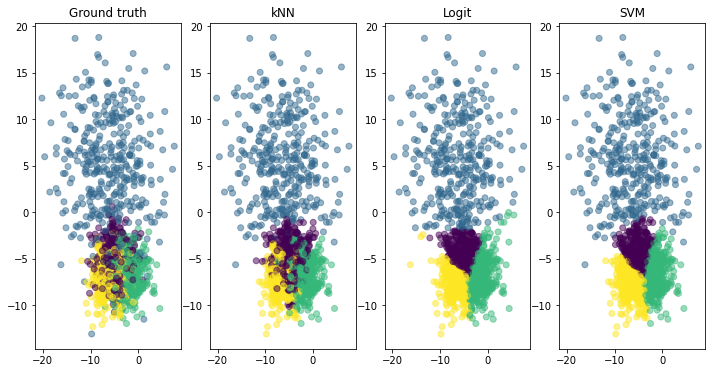

kNN score:   0.750
Logit score: 0.685
SVM score:   0.698

kNN score, cross validated:   0.648
Logit score, cross validated: 0.685
SVM score, cross validated:   0.695


In [3]:
# A few sklearn classifiers on synthetic data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# data parameters
n_samples = 1500
n_blobs=4

# make data with different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, 
    centers=n_blobs,
    cluster_std=np.random.choice( # randomize variance of each cluster
        [1.0, 5.0, 2.0], 
        size=n_blobs, 
        replace=True
    )
)

# knn
knn_clf = KNeighborsClassifier(n_neighbors=5) # instantiate
knn_clf.fit(X_varied, y_varied)               # fit
y_knn = knn_clf.predict(X_varied)             # predict

# logistic regression
logit_clf = LogisticRegression()
logit_clf.fit(X_varied, y_varied)
y_logit = logit_clf.predict(X_varied)

# svm
svm_clf = SVC()
svm_clf.fit(X_varied, y_varied)
y_svm = svm_clf.predict(X_varied)

# plot results
# set up plot
plt.figure(figsize=(12, 6))
# input data
plt.subplot(141)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, alpha=0.5)
plt.title("Ground truth")
# knn
plt.subplot(142)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_knn, alpha=0.5)
plt.title("kNN")
# logit
plt.subplot(143)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_logit, alpha=0.5)
plt.title("Logit")
# svm
plt.subplot(144)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_svm, alpha=0.5)
plt.title("SVM")
plt.show()

# scoring (naive, not cross-validated)
print(f"kNN score:   {knn_clf.score(X_varied, y_varied):.3f}")
print(f"Logit score: {logit_clf.score(X_varied, y_varied):.3f}")
print(f"SVM score:   {svm_clf.score(X_varied, y_varied):.3f}")

# scoring (with cross validation)
print(f"\nkNN score, cross validated:   {np.mean(cross_val_score(knn_clf, X_varied, y_varied)):.3f}")
print(f"Logit score, cross validated: {np.mean(cross_val_score(logit_clf, X_varied, y_varied)):.3f}")
print(f"SVM score, cross validated:   {np.mean(cross_val_score(svm_clf, X_varied, y_varied)):.3f}")

Note the modest difference in accuracy that comes from cross validation (not fitting and testing on the same data).